## Programming Exercise 1: Linear Regression

- 첫 번째 실습 입니다.

$$ x \times y$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 2 Linear regression with one variable

In [2]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [4]:
X.shape

(97, 2)

In [15]:
X[-1:,-1]

array([ 5.4369])

In [26]:
X[:,0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
X[:,1]

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

#### 2.1 Plotting the Data

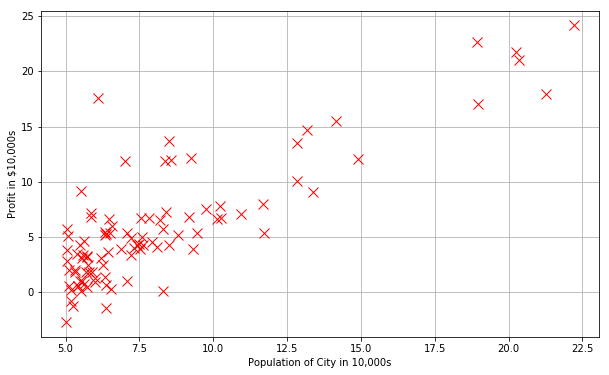

In [31]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

#### 2.2 Gradient Descent

$$H_{\theta}(\theta_{1}X+\theta_{0})$$

$$Cost(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

In [32]:
iterations = 1500
alpha = 0.01

$$Cost(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

In [46]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

In [47]:
# 0으로 Weight vector를 초기화하면 Cost 값은 32.07
initial_theta = np.zeros((X.shape[1],1)) # 2 by 1 행렬 0으로 초기화
print (computeCost(initial_theta,X,y))

32.072733877455676


In [42]:
initial_theta.shape

(2, 1)

$$Cost(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

$$\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}$$

In [93]:
# Gradient Descent Algorithm 구현 
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))

        # 웨이트를 동시에 업데이트 해야 한다. (Batch learning)
        for j in range(len(tmptheta)):
            # 같은 루틴으로 처리하기 위해서 X의 0번째 컬럼에는 1이 저장됨.
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        
        # Loop를 빠져나와 한번에 업데이트함.
        theta = tmptheta
    return theta, thetahistory, jvec

In [94]:
#Actually run gradient descent to get the best-fit theta values
#initial_theta = np.zeros((X.shape[1],1))
initial_theta = np.array([[-10],[5]])   # Create a rank 2 array
theta, thetahistory, jvec = descendGradient(X,initial_theta)

In [84]:
print(jvec[0:5])
print(jvec[-5:-1])
print(len(jvec))

[32.072733877455676, 6.79372769071752, 5.934595771472088, 5.9014281222320975, 5.895503091000778]
[4.483224860792985, 4.483202151971067, 4.483179525613663, 4.483156981421314]
1500


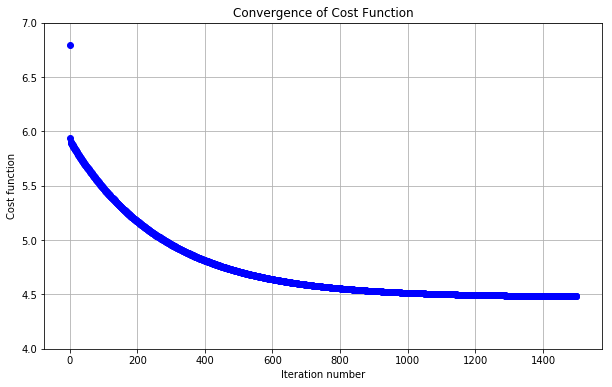

In [85]:
# cost function이 Convergence (수렴)하는 것을 그래프로 그려 본다.
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])

plotConvergence(jvec)
dummy = plt.ylim([4,7]) #그냥 그래프를 이쁘게 보이기 위해서 추가한것

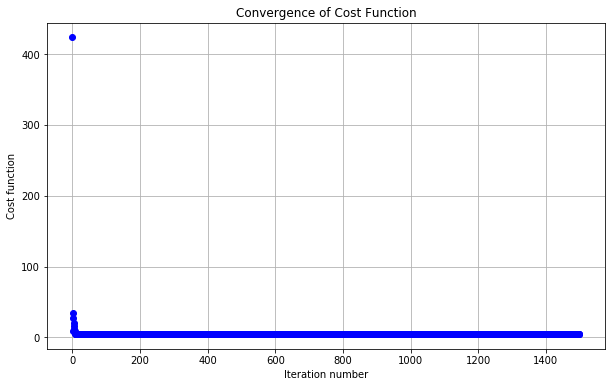

In [95]:
plotConvergence(jvec)
#dummy = plt.ylim([4,7]) #그냥 그래프를 이쁘게 보이기 위해서 추가한것

In [86]:
# 1500번 gradient descent를 수행한 후에 계산된 최적의 값
theta

array([[-3.63606348],
       [ 1.16698916]])

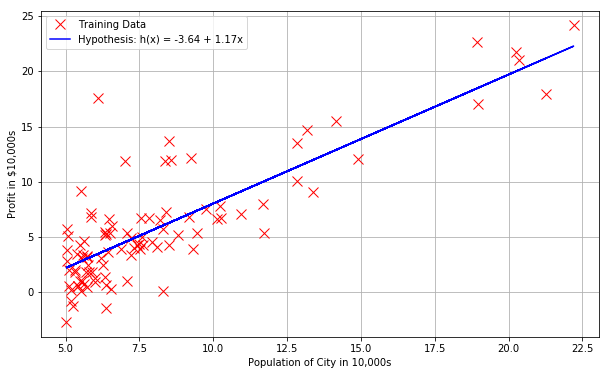

In [61]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

#### 2.4 Visualizing _J($\theta$)_

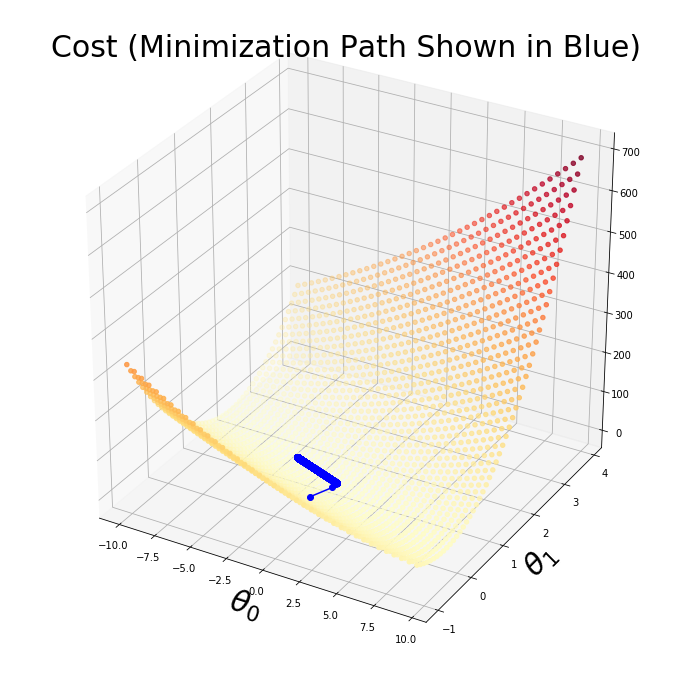

In [62]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)

plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

### 3. Linear Regression with multiple variables

In [10]:
datafile = 'data/ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

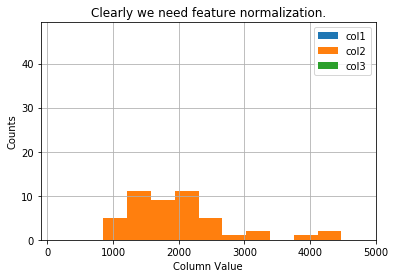

In [12]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [13]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in xrange(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

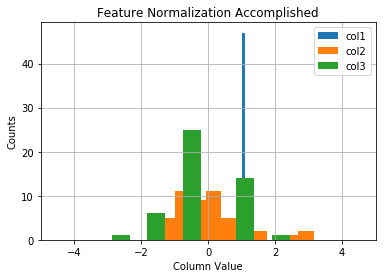

In [14]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

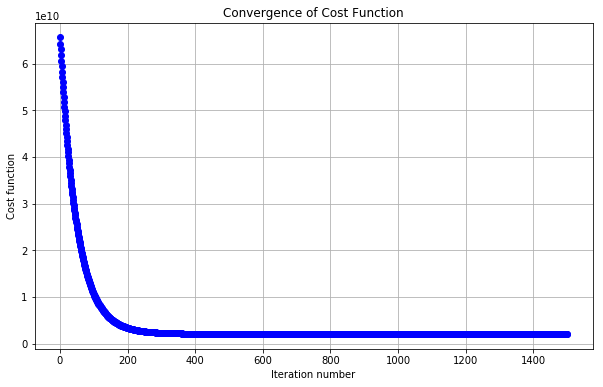

In [15]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

#Plot convergence of cost function:
plotConvergence(jvec)

In [16]:
#print "Final result theta parameters: \n",theta
print "Check of result: What is price of house with 1650 square feet and 3 bedrooms?"
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in xrange(len(ytest))]
ytestscaled.insert(0,1)
print "$%0.2f" % float(h(theta,ytestscaled))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


In [17]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [18]:
print "Normal equation prediction for price of house with 1650 square feet and 3 bedrooms"
print "$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3]))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46
